In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
data=pd.read_csv("C:/Users/Rajesh/Documents/me/data_assignments/mod15/book.csv")
data.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


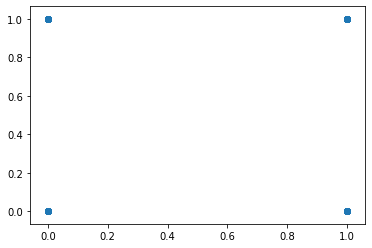

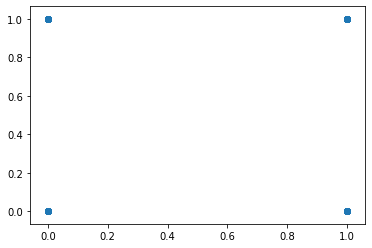

In [4]:
import seaborn as sns
#EDA
data.shape
data.dtypes
data.isna()
data.describe()
data.corr()
plt.scatter(x=data['ChildBks'],y=data['RefBks'])
plt.show()
plt.scatter(x=data['YouthBks'],y=data['ChildBks'])
plt.show()

In [7]:
#had to use pip install mlxtend to import mlxtend
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets=apriori(data,min_support=0.02,max_len=5,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
266,0.0200,"(CookBks, GeogBks, YouthBks, ArtBks, ItalCook)"
267,0.0275,"(CookBks, GeogBks, DoItYBks, ArtBks, RefBks)"
268,0.0215,"(CookBks, GeogBks, DoItYBks, ArtBks, ItalCook)"
269,0.0250,"(CookBks, ItalArt, DoItYBks, ArtBks, ItalCook)"


In [8]:
frequent_itemsets.sort_values('support',ascending=False,inplace=True)
frequent_itemsets

,support,itemsets
2,0.431,(CookBks)
0,0.423,(ChildBks)
3,0.282,(DoItYBks)
6,0.276,(GeogBks)
12,0.256,"(ChildBks, CookBks)"
...,...,...
266,0.020,"(CookBks, GeogBks, YouthBks, ArtBks, ItalCook)"
91,0.020,"(ItalAtlas, ChildBks, ItalCook)"
47,0.020,"(ItalArt, RefBks)"
181,0.020,"(ItalAtlas, ChildBks, ItalCook, CookBks)"


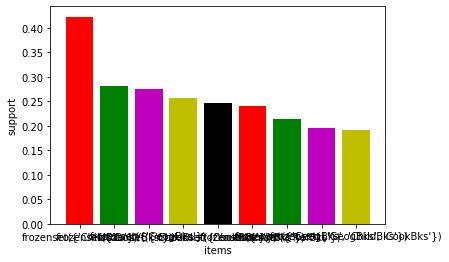

In [9]:
import matplotlib.pyplot as plt
plt.bar(x=list(range(1,10)),height=frequent_itemsets.support[1:10],color='rgmyk');plt.xlabel("items");plt.ylabel("support");
plt.xticks(list(range(1,10)),frequent_itemsets.itemsets[1:10])
plt.show()

In [10]:
arules=association_rules(frequent_itemsets,metric="lift",min_threshold=1)
arules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.2560,0.593968,1.404179,0.073687,1.421069
2,(GeogBks),(ChildBks),0.276,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
3,(ChildBks),(GeogBks),0.423,0.276,0.1950,0.460993,1.670264,0.078252,1.343211
4,(GeogBks),(CookBks),0.276,0.431,0.1925,0.697464,1.618245,0.073544,1.880766


In [11]:
arules.sort_values('lift',ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2893,"(ItalAtlas, ChildBks, CookBks)","(RefBks, ItalCook)",0.0225,0.0465,0.020,0.888889,19.115890,0.018954,8.581500
2912,"(RefBks, ItalCook)","(ItalAtlas, ChildBks, CookBks)",0.0465,0.0225,0.020,0.430108,19.115890,0.018954,1.715236
2495,"(RefBks, ItalCook)","(ItalAtlas, CookBks)",0.0465,0.0285,0.023,0.494624,17.355216,0.021675,1.922330
2498,"(ItalAtlas, CookBks)","(RefBks, ItalCook)",0.0285,0.0465,0.023,0.807018,17.355216,0.021675,4.940864
2407,"(GeogBks, ItalArt, CookBks)","(ArtBks, ItalCook)",0.0250,0.0565,0.024,0.960000,16.991150,0.022587,23.587500


In [12]:
def to_list(i):
    return(sorted(list(i)))
max=arules.antecedents.apply(to_list)+arules.consequents.apply(to_list)
max=max.apply(sorted)
max

0                                    [ChildBks, CookBks]
1                                    [ChildBks, CookBks]
2                                    [ChildBks, GeogBks]
3                                    [ChildBks, GeogBks]
4                                     [CookBks, GeogBks]
                              ...                       
2913    [ChildBks, CookBks, ItalAtlas, ItalCook, RefBks]
2914    [ChildBks, CookBks, ItalAtlas, ItalCook, RefBks]
2915    [ChildBks, CookBks, ItalAtlas, ItalCook, RefBks]
2916    [ChildBks, CookBks, ItalAtlas, ItalCook, RefBks]
2917    [ChildBks, CookBks, ItalAtlas, ItalCook, RefBks]
Length: 2918, dtype: object

In [15]:
rules_set=list(max)
rules_set

[['ChildBks', 'CookBks'],
 ['ChildBks', 'CookBks'],
 ['ChildBks', 'GeogBks'],
 ['ChildBks', 'GeogBks'],
 ['CookBks', 'GeogBks'],
 ['CookBks', 'GeogBks'],
 ['CookBks', 'DoItYBks'],
 ['CookBks', 'DoItYBks'],
 ['ChildBks', 'DoItYBks'],
 ['ChildBks', 'DoItYBks'],
 ['ArtBks', 'CookBks'],
 ['ArtBks', 'CookBks'],
 ['ChildBks', 'YouthBks'],
 ['ChildBks', 'YouthBks'],
 ['ArtBks', 'ChildBks'],
 ['ArtBks', 'ChildBks'],
 ['CookBks', 'YouthBks'],
 ['CookBks', 'YouthBks'],
 ['CookBks', 'RefBks'],
 ['CookBks', 'RefBks'],
 ['ChildBks', 'RefBks'],
 ['ChildBks', 'RefBks'],
 ['ChildBks', 'CookBks', 'GeogBks'],
 ['ChildBks', 'CookBks', 'GeogBks'],
 ['ChildBks', 'CookBks', 'GeogBks'],
 ['ChildBks', 'CookBks', 'GeogBks'],
 ['ChildBks', 'CookBks', 'GeogBks'],
 ['ChildBks', 'CookBks', 'GeogBks'],
 ['ChildBks', 'CookBks', 'DoItYBks'],
 ['ChildBks', 'CookBks', 'DoItYBks'],
 ['ChildBks', 'CookBks', 'DoItYBks'],
 ['ChildBks', 'CookBks', 'DoItYBks'],
 ['ChildBks', 'CookBks', 'DoItYBks'],
 ['ChildBks', 'CookBks', '

In [16]:
unique_ruleset=[list(i) for i in set(tuple(j) for j in rules_set)]
unique_ruleset

[['ArtBks', 'RefBks'],
 ['CookBks', 'RefBks', 'YouthBks'],
 ['CookBks', 'DoItYBks', 'GeogBks', 'ItalCook'],
 ['ArtBks', 'ChildBks', 'CookBks', 'DoItYBks', 'ItalArt'],
 ['ArtBks', 'DoItYBks', 'GeogBks'],
 ['ChildBks', 'CookBks', 'RefBks', 'YouthBks'],
 ['ArtBks', 'ChildBks', 'CookBks', 'GeogBks', 'YouthBks'],
 ['ChildBks', 'CookBks', 'ItalAtlas', 'ItalCook'],
 ['ChildBks', 'GeogBks', 'YouthBks'],
 ['CookBks', 'DoItYBks', 'ItalCook', 'YouthBks'],
 ['CookBks', 'DoItYBks', 'ItalArt', 'ItalCook'],
 ['ArtBks', 'ItalArt', 'ItalCook'],
 ['ChildBks', 'CookBks', 'DoItYBks', 'RefBks'],
 ['ArtBks', 'CookBks', 'DoItYBks', 'GeogBks'],
 ['CookBks', 'ItalArt'],
 ['GeogBks', 'ItalCook', 'YouthBks'],
 ['CookBks', 'GeogBks'],
 ['ChildBks', 'ItalCook', 'RefBks', 'YouthBks'],
 ['ArtBks', 'CookBks', 'GeogBks', 'RefBks'],
 ['ArtBks', 'CookBks', 'Florence', 'GeogBks'],
 ['CookBks', 'RefBks'],
 ['ChildBks', 'CookBks', 'GeogBks', 'ItalCook'],
 ['DoItYBks', 'ItalCook', 'YouthBks'],
 ['ChildBks', 'CookBks', 'Ital

In [17]:
index=[]
for i in unique_ruleset:
    index.append(rules_set.index(i))
index

[144,
 268,
 1252,
 2786,
 294,
 312,
 732,
 2874,
 100,
 1386,
 2176,
 1110,
 280,
 340,
 1028,
 1246,
 4,
 2236,
 770,
 2476,
 18,
 590,
 1402,
 2592,
 1622,
 360,
 2738,
 1966,
 2822,
 422,
 536,
 1030,
 174,
 2074,
 2726,
 424,
 790,
 42,
 2008,
 60,
 98,
 1122,
 2330,
 1116,
 1080,
 796,
 2452,
 1550,
 2534,
 180,
 58,
 1708,
 2816,
 506,
 1862,
 2250,
 690,
 2772,
 730,
 1678,
 1378,
 714,
 22,
 1008,
 1198,
 1856,
 2490,
 2464,
 1210,
 2732,
 2712,
 492,
 12,
 762,
 34,
 1612,
 1716,
 858,
 2300,
 254,
 1826,
 2388,
 2618,
 2872,
 1408,
 274,
 1994,
 542,
 1614,
 1766,
 1344,
 2752,
 784,
 1204,
 50,
 676,
 716,
 20,
 14,
 194,
 1746,
 852,
 2646,
 476,
 306,
 1372,
 2044,
 132,
 2652,
 242,
 1216,
 166,
 978,
 2632,
 92,
 112,
 2458,
 1428,
 1692,
 696,
 948,
 1338,
 2766,
 2146,
 388,
 2210,
 1906,
 1892,
 64,
 918,
 2132,
 2222,
 662,
 462,
 1302,
 1616,
 172,
 430,
 1580,
 2606,
 604,
 1422,
 28,
 994,
 710,
 126,
 300,
 1066,
 1672,
 556,
 80,
 1520,
 1760,
 36,
 888,
 2374

In [18]:
final_rules=arules.iloc[index,:]
final_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
144,(ArtBks),(RefBks),0.2410,0.2145,0.0895,0.371369,1.731325,0.037805,1.249541
268,"(YouthBks, RefBks)",(CookBks),0.0965,0.4310,0.0775,0.803109,1.863362,0.035908,2.889921
1252,"(GeogBks, DoItYBks, ItalCook)",(CookBks),0.0345,0.4310,0.0345,1.000000,2.320186,0.019631,inf
2786,"(ItalArt, ChildBks, DoItYBks, CookBks)",(ArtBks),0.0200,0.2410,0.0200,1.000000,4.149378,0.015180,inf
294,"(GeogBks, DoItYBks)",(ArtBks),0.1325,0.2410,0.0730,0.550943,2.286072,0.041067,1.690210
...,...,...,...,...,...,...,...,...,...
438,"(YouthBks, DoItYBks)",(RefBks),0.1155,0.2145,0.0580,0.502165,2.341093,0.033225,1.577830
1152,"(ChildBks, DoItYBks, ArtBks, CookBks)",(RefBks),0.0820,0.2145,0.0370,0.451220,2.103587,0.019411,1.431356
2438,"(RefBks, ArtBks, ItalCook)",(CookBks),0.0235,0.4310,0.0235,1.000000,2.320186,0.013371,inf
2264,"(ChildBks, YouthBks, RefBks, CookBks)",(ItalCook),0.0680,0.1135,0.0245,0.360294,3.174398,0.016782,1.385793


In [19]:
final_rules=final_rules.sort_values('lift',ascending=False).head()
final_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2402,"(GeogBks, ItalArt, ArtBks, CookBks)",(ItalCook),0.0250,0.1135,0.0240,0.960000,8.458150,0.021163,22.16250
1716,"(ItalArt, ChildBks, ArtBks, CookBks)",(ItalCook),0.0300,0.1135,0.0285,0.950000,8.370044,0.025095,17.73000
2146,"(ItalArt, DoItYBks, ArtBks, CookBks)",(ItalCook),0.0270,0.1135,0.0250,0.925926,8.157938,0.021936,11.96775
2888,"(ItalAtlas, ChildBks, RefBks, CookBks)",(ItalCook),0.0225,0.1135,0.0200,0.888889,7.831620,0.017446,7.97850
2216,"(ItalArt, DoItYBks)",(ItalCook),0.0300,0.1135,0.0250,0.833333,7.342144,0.021595,5.31900
